In [3]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

from graph import *
from robustness import *
from attack import *
from recover import *
from experiment import *

In [4]:
RANDOM = 0  # Add a random edge
PREFERENTIAL_MIN_MIN = 1    # Connect 2 nodes with the smallest degrees
PREFERENTIAL_MIN_MAX = 2    # Connect nodes with the smallest and largest degrees
PREFERENTIAL_MAX_MAX = 3    # Connect 2 nodes with the largest degrees

# Experiments

For different attack levels (fraction of edges to be removed), perform an attack on agraph with inital diameter d0. 

After each attack measure the diameter - d1

Perform a recovery based on 1 out of 4 possible options. Report how many edges were needed to get to the initial diameter d0. 

Attack a recovered graph and report it's new robustnes. 

## Scale-free graph

In [8]:
SF = graph(size=10)
initial_diameter, initial_lcc, av = get_robustness(SF)

14


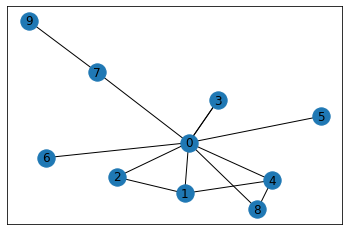

In [9]:
nx.draw_networkx(SF)
print(SF.size())

Edge removed between 0 1
Edge removed between 0 4
12


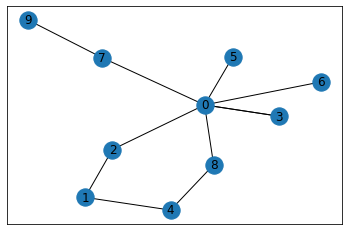

In [10]:
SF_attacked = targeted_edge_attack(SF, 0.2)
nx.draw_networkx(SF_attacked)
print(SF_attacked.size())

### Targeted attack 

In [6]:
attack_level = [0.01, 0.02, 0.05, 0.1, 0.15, 0.2]
recovery_option = [0, 1, 2, 3]
num_edges= {0:[], 1:[], 2:[], 3:[]}
diameter_first_attack = []
diameter_second_attack = {0:[], 1:[], 2:[], 3:[]}
path = "Experiments/SF/target/"
edges_removed_during_attack = np.array(attack_level)*SF.size()

In [7]:
for al in attack_level:
    # First attack
    SF_attack_1 = targeted_edge_attack(SF, al) 
    diameter_first_attack.append(get_diameter(SF_attack_1)) 
    
    for ro in recovery_option:
        # Recovery
        SF_recovered, ne = recover_to_initial_diameter(initial_diameter, initial_lcc, SF_attack_1, recovery_option=ro)
        num_edges[ro].append(ne)
        
        # Second attack 
        SF_attack_2 = targeted_edge_attack(SF_recovered, al) 
        diameter_second_attack[ro].append(get_diameter(SF_attack_2))
        
    print("Finished attack level", al)

Finished attack level 0.01
Finished attack level 0.02
Finished attack level 0.05


Exception: Incorrect recovery option specified

Save data

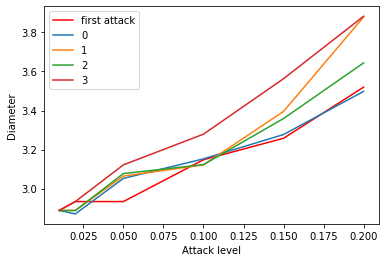

In [8]:
# Diameter after the first attack and after second for each recovery option
plot_diameter(attack_level, diameter_first_attack, recovery_option, diameter_second_attack, path)

There is no visible improvement in the robustness. Option 0, which is random addition, seems to work the best, while connecting min and min degrees nodes (option 1) and max and max (option 3) gives the worst result.

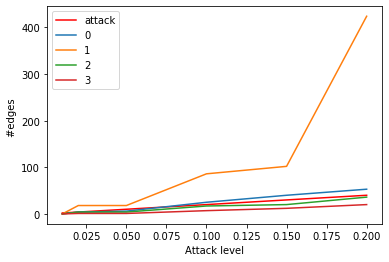

In [9]:
plot_num_edges(attack_level, edges_removed_during_attack, recovery_option, num_edges, path)

All recovery options need a small number of nodes to reach the initial robustness. The expection is min min edge, which needs much more edges than were removed. 

In [10]:
save_data(num_edges, diameter_first_attack, diameter_second_attack, attack_level, path)

### Random attack 

In [15]:
attack_level = [0.01, 0.02, 0.05, 0.1, 0.15]
recovery_option = [0, 1, 2, 3]
num_edges= {0:[], 1:[], 2:[], 3:[]}
diameter_first_attack = []
diameter_second_attack = {0:[], 1:[], 2:[], 3:[]}
edges_removed_during_attack = np.array(attack_level)*SF.size()
path = "Experiments/SF/random/"

In [ ]:
for al in attack_level:
    # First attack
    SF_attack_1 = random_edge_attack(SF, al) 
    diameter_first_attack.append(get_diameter(SF_attack_1)) 
    
    for ro in recovery_option:
        # Recovery
        SF_recovered, ne = recover_to_initial_diameter(initial_diameter, initial_lcc, SF_attack_1, recovery_option=ro)
        num_edges[ro].append(ne)
        
        # Second attack 
        SF_attack_2 = random_edge_attack(SF_recovered, al) 
        diameter_second_attack[ro].append(get_diameter(SF_attack_2))
        
    print("Finished attack level", al)

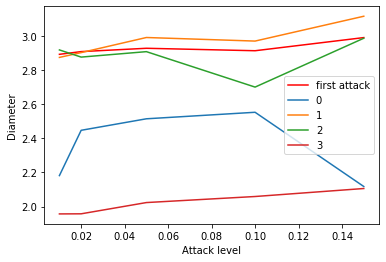

In [17]:
plot_diameter(attack_level, diameter_first_attack, recovery_option, diameter_second_attack, path)

Most options make the network more robust against the next random attack. The expeptuin is min min edge.

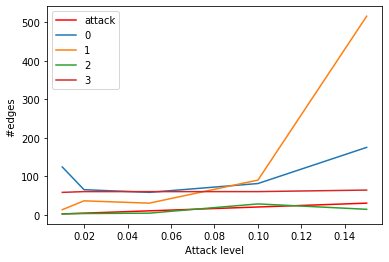

In [18]:
plot_num_edges(attack_level, edges_removed_during_attack, recovery_option, num_edges, path)

In [20]:
save_data(num_edges, diameter_first_attack, diameter_second_attack, attack_level, path)

## Erdos_Renyi Random graph

In [48]:
ER = graph('ER', 50, 0.01)
initial_diameter, initial_lcc, av = get_robustness(ER)

### Targeted attack

In [49]:
attack_level = [0.01, 0.02, 0.05, 0.1, 0.15]
recovery_option = [0, 1, 2, 3]
num_edges= {0:[], 1:[], 2:[], 3:[]}
diameter_first_attack = []
diameter_second_attack = {0:[], 1:[], 2:[], 3:[]}
edges_removed_during_attack = np.array(attack_level)*SF.size()
path = "Experiments/ER/target/"
for al in attack_level:
    # First attack
    ER_attack_1 = targeted_edge_attack(ER, al) 
    diameter_first_attack.append(get_diameter(ER_attack_1)) 
    
    for ro in recovery_option:
        # Recovery
        ER_recovered, ne = recover_to_initial_diameter(initial_diameter, initial_lcc, ER_attack_1, recovery_option=ro)
        num_edges[ro].append(ne)
        
        # Second attack 
        ER_attack_2 = targeted_edge_attack(ER_recovered, al) 
        diameter_second_attack[ro].append(get_diameter(ER_attack_2))
        
    print("Finished attack level", al)

Finished attack level 0.01
Finished attack level 0.02
Finished attack level 0.05
Finished attack level 0.1
Finished attack level 0.15


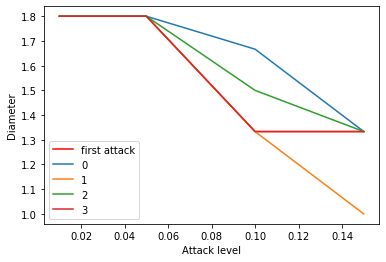

In [50]:
plot_diameter(attack_level, diameter_first_attack, recovery_option, diameter_second_attack, path)

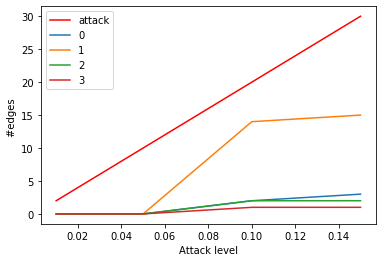

In [51]:
plot_num_edges(attack_level, edges_removed_during_attack, recovery_option, num_edges, path)

In [53]:
save_data(num_edges, diameter_first_attack, diameter_second_attack, attack_level, path)

FileExistsError: [Errno 17] File exists: 'Experiments/ER/target/num_edges.txt'

## Random attack

In [55]:
attack_level = [0.01, 0.02, 0.05, 0.1, 0.15]
recovery_option = [0, 1, 2, 3]
num_edges= {0:[], 1:[], 2:[], 3:[]}
diameter_first_attack = []
diameter_second_attack = {0:[], 1:[], 2:[], 3:[]}
edges_removed_during_attack = np.array(attack_level)*SF.size()
path = "Experiments/ER/random/"

for al in attack_level:
    # First attack
    SF_attack_1 = random_edge_attack(SF, al) 
    diameter_first_attack.append(get_diameter(SF_attack_1)) 
    
    for ro in recovery_option:
        # Recovery
        SF_recovered, ne = recover_to_initial_diameter(initial_diameter, initial_lcc, SF_attack_1, recovery_option=ro)
        num_edges[ro].append(ne)
        
        # Second attack 
        SF_attack_2 = random_edge_attack(SF_recovered, al) 
        diameter_second_attack[ro].append(get_diameter(SF_attack_2))
        
    print("Finished attack level", al)

IndexError: Cannot choose from an empty sequence

In [ ]:
plot_diameter(attack_level, diameter_first_attack, recovery_option, diameter_second_attack, path)
plot_num_edges(attack_level, edges_removed_during_attack, recovery_option, num_edges, path)
save_data(num_edges, diameter_first_attack, diameter_second_attack, attack_level, path)

## Diameter LCC ratio

In [24]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

from graph import *
from robustness import *
from attack import *
from recover import *
from experiments import *

In [25]:
SF = graph(size=100)
initial_diameter, initial_lcc, av = get_robustness(SF)

/Users/victorialapshyna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/victorialapshyna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [26]:
attack_level = [0.01, 0.02, 0.05, 0.1]
recovery_option = [0, 1, 2, 3]
num_edges= {0:[], 1:[], 2:[], 3:[]}
d_lcc_first_attack = []
d_lcc_second_attack = {0:[], 1:[], 2:[], 3:[]}
path = "Experiments/SF/target/"
edges_removed_during_attack = np.array(attack_level)*SF.size()

In [29]:
attack_level = [0.15, 0.3, 0.5]

In [30]:
for al in attack_level:
    # First attack
    SF_attack_1 = targeted_edge_attack(SF, al) 
    d, lcc, av = get_robustness(SF_attack_1)
    d_lcc_first_attack.append(d/lcc) 
    
    for ro in recovery_option:
        # Recovery
        SF_recovered, ne = recover_to_initial_diameter_lcc_ratio(initial_diameter, initial_lcc, SF_attack_1, recovery_option=ro)
        num_edges[ro].append(ne)
        
        # Second attack 
        SF_attack_2 = targeted_edge_attack(SF_recovered, al) 
        d2, lcc2, av = get_robustness(SF_attack_2)
        d_lcc_second_attack[ro].append(d2/lcc2)
        
    print("Finished attack level", al)

/Users/victorialapshyna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/victorialapshyna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Diameter: 2.4349494949494948
Size of Largest Connected Component: 100
Average isolated connected component size: 0
Diameter: 2.4345454545454546
Size of Largest Connected Component: 100
Average isolated connected component size: 0
Diameter: 2.433333333333333
Size of Largest Connected Component: 100
Average isolated connected component size: 0
Diameter: 2.435151515151515
Size of Largest Connected Component: 100
Average isolated connected component size: 0
Finished attack level 0.15
Diameter: 2.4274747474747476
Size of Largest Connected Component: 100
Average isolated connected component size: 0
Diameter: 2.5345454545454547
Size of Largest Connected Component: 100
Average isolated connected component size: 0
Diameter: 2.4317171717171715
Size of Largest Connected Component: 100
Average isolated connected component size: 0
Diameter: 2.4349494949494948
Size of Largest Connected Component: 100
Average isolated connected component size: 0
Finished attack level 0.3
Diameter: 2.605050505050505
S

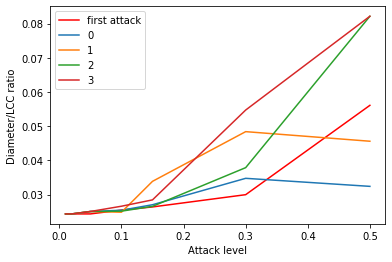

In [32]:
plt.plot(attack_level, d_lcc_first_attack, label="first attack", color='r')
for ro in recovery_option:
    plt.plot(attack_level, d_lcc_second_attack[ro], label=ro)

plt.xlabel("Attack level")
plt.ylabel("Diameter/LCC ratio")

plt.legend()

In [31]:
attack_level = [0.01, 0.02, 0.05, 0.1, 0.15, 0.3, 0.5]

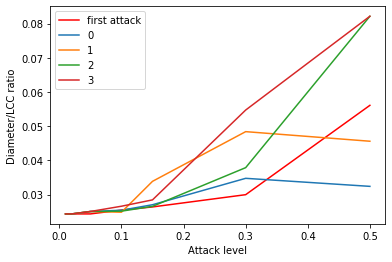

In [34]:
plt.plot(attack_level, d_lcc_first_attack, label="first attack", color='r')
for ro in recovery_option:
    plt.plot(attack_level, d_lcc_second_attack[ro], label=ro)

plt.xlabel("Attack level")
plt.ylabel("Diameter/LCC ratio")

plt.legend()

path = path = "Experiments/SF/target/"
plt.savefig(path+"diameter_lcc.pdf")

In [36]:
f = open(path + "d_lcc_first_attack.txt", "x")
json.dump(d_lcc_first_attack, f)
f.close()